# INTRODUCTION

In [24]:
import pandas as pd
import numpy as np

link = 'https://raw.githubusercontent.com/QuantikDataStudio/dataset/main/kickstarter.csv'

data = pd.read_csv(link, on_bad_lines='skip', index_col = 0)
data.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real;;
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.0,0.00,1533.95;;
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.0,2421.00,30000.00;;
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.0,220.00,45000.00;;
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.0,1.00,5000.00;;
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.0,1283.00,19500.00;;


In [25]:
columns_to_drop = ['usd pledged', 'usd_pledged_real', 'usd_goal_real;;'] # Nous permet de supprimer les trois 03 dernieres colonnes qui ne nous servent a rien 
data = data.drop(columns=columns_to_drop)

In [26]:
data = data.dropna()  # Enleve les ligne qui contiennent au moins une valeur manquante

In [27]:
print(data['goal']) # Le type ici est un Object ce qui n'est pas bon car on veut des Float. pour se faire en mettant data['goal'].astype(float) on a une erreur car contient des element de la forme '2014-05-01 17:36:59' . On cherche alors par la suite a supprimer ces elements qui contiennent des "tirets < - > "

ID
1000002330      1000.00
1000003930     30000.00
1000004038     45000.00
1000007540      5000.00
1000011046     19500.00
                ...    
1448687698      1800.00
1448688798       600.00
1448696449      5000.00
1448702836     15000.00
1448719328    195000.00
Name: goal, Length: 77589, dtype: object


In [28]:
data = data[~data['goal'].str.contains('-')].copy()    # Cette syntaxe est utilisée pour supp les lignes ave c des tirets on assigne ensuite a data['goal'] puis on connvertit en float. ON    ajoute apes notre code .copy() pour eviter les erreurs et ne pas ecraser la valeur de data['goal'] initiale
data['goal'] = data['goal'].astype(float)

In [29]:
# On fait la meme chose avec les deux autres colonnes 'pledged' et 'backers' devant chacun etre respectivement des decimaux et des entiers N

data['pledged'] = data['pledged'].astype(float) # Argent promis qui peut avoir des centimes 19,99 euros et backers qui decompte le nombre de personne 
data['backers'] = data['backers'].astype(int)

In [30]:
masque = data['goal'] < 600000  # On cree un dataset plus petit avc des chiffres gerables 
data = data.loc[masque].copy()

In [33]:
# Pour connaitre les valeurs de "state"
  
'''Failed pour les projets qui n'ont pas atteint le quota d'argent requis
canceled pour les projets annulés
successful pour les projets qui ont atteints le montant requis
live pour les projets en cours 
suspended pour les projets suspendu
'''

data.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

In [35]:
# On ne s'interesse qu'aux projets succesful et failed

masque = (data['state'] == 'failed') | (data['state'] == 'successful')  # Ici on veu soit les projets qui ont soit echou", soit reussi
data = data.loc[masque].copy()
data = data.head(20000) # Lorsqu'on a de milliers de lignes on peut prendre un nombre de ligne au hasard parce que dans ce cas les 20000 premieres lignes peuvent avoir la meme syntaxe et par exple a partir de 40000 la syntaxe change on emploit donc la methode 'SAMPLE'


In [36]:
data.info();


<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1000002330 to 113204057
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           20000 non-null  object 
 1   category       20000 non-null  object 
 2   main_category  20000 non-null  object 
 3   currency       20000 non-null  object 
 4   deadline       20000 non-null  object 
 5   goal           20000 non-null  float64
 6   launched       20000 non-null  object 
 7   pledged        20000 non-null  float64
 8   state          20000 non-null  object 
 9   backers        20000 non-null  int64  
 10  country        20000 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.8+ MB


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
ID,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US


In [37]:
data.head()         # Rendu final

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
ID,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US


# Moyenne, médiane et quantiles


+ Déterminer les variables numériques et les stocker dans un tableau num_data

In [38]:
num_data = data.select_dtypes(include=['int64','float64'])  # SELECT_DTYPES est une methode. On ne peut calculer la moyenne que sur les valeurs num
num_data

,goal,pledged,backers
ID,,,
1000002330,1000.0,0.0,0
1000003930,30000.0,2421.0,15
1000004038,45000.0,220.0,3
1000007540,5000.0,1.0,1
1000014025,50000.0,52375.0,224
...,...,...,...
1132019813,4000.0,4550.0,55
1132026580,1500.0,15.0,1
1132035662,35000.0,35912.0,367


+ Calculer la moyenne de chaque variable contenue dans num_data et les stocker dans un DataFrame stats avec comme unique colonne moyenne.
+ Comparer la moyenne des collectes (pledged) avec celle des objectifs fixés (goal). Que constatez-vous ?

> Pour la création du DataFrame stats, on pourra utiliser `pd.DataFrame` et l'attribut columns.
>
> Pour le calcul des moyennes, on pourra s'aider de `pandas.DataFrame.mean()`.

In [39]:
# Calcul de la moyenne de chaque variable contenue dans num_data
num_data.mean()

goal       17944.893169
pledged    10514.226824
backers      116.169950
dtype: float64

In [41]:
# Creation du DataFrame

stats = pd.DataFrame(num_data.mean(), columns=['moyenne'])
stats

,moyenne
goal,17944.893169
pledged,10514.226824
backers,116.169950


In [42]:
# Afficher seulement 2 chiffres significatifs.
stats.round(2)

,moyenne
goal,17944.89
pledged,10514.23
backers,116.17


In [46]:
moyenne_depart = np.mean([1,2,3,4,5,6,7,8,9,10])
moyenne_depart_exageree = np.mean([1,2,3,4,5,6,7,8,9,10,1000])
print('moyenne_depart', moyenne_depart)
print('moyenne_depart_exageree', moyenne_depart_exageree)
mediane_depart = np.median([1,2,3,4,5,6,7,8,9,10])
mediane_depart_exageree = np.median([1,2,3,4,5,6,7,8,9,10,1000])
print('mediane_depart', mediane_depart)
print('mediane_depart_exageree', mediane_depart_exageree)

moyenne_depart 5.5
moyenne_depart_exageree 95.9090909090909
mediane_depart 5.5
mediane_depart_exageree 6.0


La moyenne est une bonne entrée en matière, cependant elle ne permet pas d'avoir une répartition précise des données. Pour cela, la médiane est un indicateur plus précis.

Elle se définit ainsi : la médiane d'un ensemble de valeurs est la valeur x qui permet de couper l'ensemble des valeurs en deux parties égales : mettant d'un côté une moitié des valeurs, qui sont toutes inférieures ou égales à x et de l'autre côté l'autre moitié des valeurs, qui sont toutes supérieures ou égales à x (s'il y a un nombre impair de valeurs, la valeur centrale sera mise des deux côtés).

In [48]:
pd.DataFrame(num_data.median(), columns = ['median'])

,median
goal,5000.0
pledged,757.0
backers,15.0


In [49]:
stats['median'] = num_data.median()
stats

,moyenne,median
goal,17944.893169,5000.0
pledged,10514.226824,757.0
backers,116.169950,15.0


Malgré une moyenne élevée, **on constate que la moitié des objectifs fixés ne dépassent pas 5500€**.

De même pour les dons récoltés et le nombre de contributeurs qui ont respectivement la moitié en dessous de 600€ et 12 personnes.

**Cela laisse apparaître la présence de valeurs extrêmes qui tirent vers le haut la moyenne.**

+ On observe déjà la faiblesse d'un indicateur comme la moyenne qui est fortement influencée par les valeurs extrêmes.

In [51]:
stats['mean_med_diff'] = abs( stats['moyenne'] - stats['median'])
stats.round(2)


,moyenne,median,mean_med_diff
goal,17944.89,5000.0,12944.89
pledged,10514.23,757.0,9757.23
backers,116.17,15.0,101.17


Pour donner une interprétation de cette nouvelle variable, il faut bien avoir en tête les ordres de grandeur de chaque variable. Dans notre cas, on constate à travers la variable nouvellement créée que la médiane et la moyenne sont systématiquement très éloignées. Cela nous renseigne sur **l'hétérogénéité** des variables dont nous disposons. Il semble clairement qu'on dispose d'un nombre important de campagne de financement avec de petits montants et d'un nombre moindre de campagne avec de gros montants.

  

---



Pour confirmer notre analyse, il est nécessaire de regarder les **quantiles** de chaque variable.

  

> Les **quantiles** sont les valeurs qui divisent un jeu de données en intervalles contenant le même nombre de données.
De manière générale, on divise le jeu de données en 4 de telle sorte que le premier quantile renvoie la valeur à partir de laquelle on retrouve 25% des valeurs et ainsi de suite pour les autres quantiles.

In [58]:
num_data.quantile(q = [0.25,0.5,0.75]).transpose()

,0.25,0.50,0.75
goal,2000.0,5000.0,15000.00
pledged,50.0,757.0,4652.75
backers,2.0,15.0,62.00


In [59]:
num_data['goal'].quantile(q = [0.25,0.5,0.75]).transpose()

0.25     2000.0
0.50     5000.0
0.75    15000.0
Name: goal, dtype: float64

In [57]:
stats[['q1', 'q2', 'q3']] = num_data.quantile(q = [0.25,0.5,0.75]).transpose()
stats

,moyenne,median,mean_med_diff,q1,q2,q3
goal,17944.893169,5000.0,12944.893169,2000.0,5000.0,15000.00
pledged,10514.226824,757.0,9757.226824,50.0,757.0,4652.75
backers,116.169950,15.0,101.169950,2.0,15.0,62.00


> On peut compléter notre analyse en s'intéressant au min, max de chaque variable.  
> La différence des deux nous donnera une idée de l'étendue sur laquelle se répartissent les valeurs.

-   Ajouter au tableau  **`stats`**  3 colonnes  **`min`**,  **`max`**  et  **`min_max_diff`**  renseignant le min,le max et la différence des deux.

-  Que remarquez-vous sur la différence des deux ?

In [60]:
stats['min'] = num_data.min()
stats['max'] = num_data.max()
stats['min_max_diff'] = stats['max'] - stats['min']
stats

,moyenne,median,mean_med_diff,q1,q2,q3,min,max,min_max_diff
goal,17944.893169,5000.0,12944.893169,2000.0,5000.0,15000.00,1.0,575000.0,574999.0
pledged,10514.226824,757.0,9757.226824,50.0,757.0,4652.75,0.0,5545991.7,5545991.7
backers,116.169950,15.0,101.169950,2.0,15.0,62.00,0.0,85581.0,85581.0


# VARIANCE, ECART TYPE ET OUTLIERS



> Deux derniers indicateurs nous permettent d'avoir un bon aperçu :  **la variance**  et  **l'écart-type**.  
> Ils font partie de la famille des indicateurs de dispersion :
>
> > -   La variance, qui mesure la dispersion autour de la moyenne, c'est à dire à quel point les valeurs présentes dans une liste numérique sont écartées de la moyenne.
> >
> > -   L'écart type, qui se définit mathématiquement comme la racine carrée de la variance. De par sa construction,  **l’écart type**  est également une mesure de la dispersion des valeurs.
>
>   On peut calculer facilement l'écart type d'une variable en utilisant  `pandas.Series.std()`

-     Calculer  **l'écart type**  de la variable  **`backers`**.

-    Afficher l'intervalle  **moyenne**  +/-  **ecart type**  de la variable  **`backers`**.

In [61]:
ecart_type = num_data['backers'].std()  # STD est ce qui permet de calculer l'ecart type

intervalle = [num_data['backers'].mean() - ecart_type, num_data['backers'].mean() + ecart_type] # creer un intervalle qui est celui de la moyenne moins 
print(intervalle)

[np.float64(-860.1421576446683), np.float64(1092.4820576446682)]


>  On peut tout à fait tronquer l'intervalle à 0. Le nombre de backers est toujours positif.

-    Ajouter une nouvelle colonne intitulée  **`backers_in`**  à  **`num_data`**  contenant 1 si la valeur de  **`backers`**  appartiennent à l'intervalle calculé précédemment et 0 sinon.

Pour déterminer les valeurs qui appartiennent à l'intervalle calculé précédemment, on pourra s'aider de  `pandas.Series.between(int1,int2).astype(int)`.

Pour afficher les proportions on pourra s'aider de  `pandas.Series.value_counts(normalize = True)`.

In [63]:
num_data['backers_in'] = num_data['backers'].between(intervalle[0], intervalle[1]).astype(int)

num_data['backers_in'].value_counts(normalize=True)
# Tout ce qui est  al interieur de notre intervalle est a 98 pour cent et on a 0.1 pour cent hors de l"intervalle


backers_in
1    0.98365
0    0.01635
Name: proportion, dtype: float64

In [64]:
num_data.head(10)

,goal,pledged,backers,backers_in
ID,,,,
1000002330,1000.0,0.0,0,1
1000003930,30000.0,2421.0,15,1
1000004038,45000.0,220.0,3,1
1000007540,5000.0,1.0,1,1
1000014025,50000.0,52375.0,224,1
1000023410,1000.0,1205.0,16,1
1000030581,25000.0,453.0,40,1
100004721,2500.0,0.0,0,1
100005484,12500.0,12700.0,100,1


<Axes: xlabel='backers'>

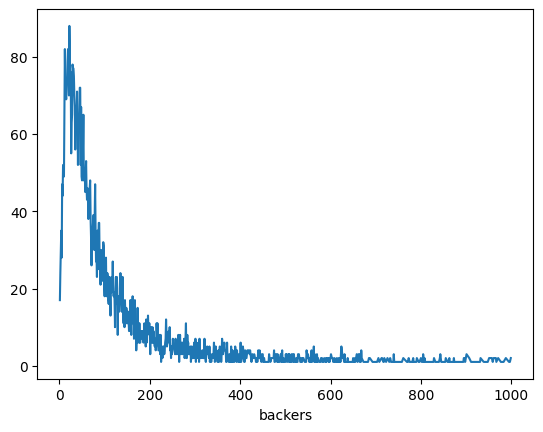

In [67]:
data[(data['state'] == "successful" ) & (data.backers<1000)].groupby('backers').size().plot()

## Analyse descriptive des variables qualitatives


L'analyse des variables qualitatives est une étape importante dans la compréhension des données.  
Elles sont souvent plus difficiles à manipuler et il est important d'observer leur relation avec les variables numériques.  
Elles livrent souvent des informations précieuses sur l'interaction entre les variables dans le jeu de données.

L'objectif de ce module est d'arriver à déterminer les modalités d'une variable qualitative et l'importance de chacune.  
Ce module vous permettra également de vous familiariser avec des méthodes simples de gestion de données.